In [1]:
import os
import cv2
import numpy as np
from skimage import morphology, util
import matplotlib.pyplot as plt


In [2]:
from google.colab import drive
drive.mount('/content/drive')



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
xray_images_dir = '/content/drive/MyDrive/clean_images'

In [4]:
def preprocess_xray(image_path):
    try:

        xray_image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)


        if xray_image is None:
            raise ValueError("Image not loaded properly")


        standard_size = (256, 256)
        xray_image = cv2.resize(xray_image, standard_size)


        blurred_image = cv2.GaussianBlur(xray_image, (5, 5), 0)


        clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
        contrast_enhanced_image = clahe.apply(blurred_image)



        return contrast_enhanced_image
    except Exception as e:
        print(f"An error occurred while processing {image_path}: {e}")
        return None


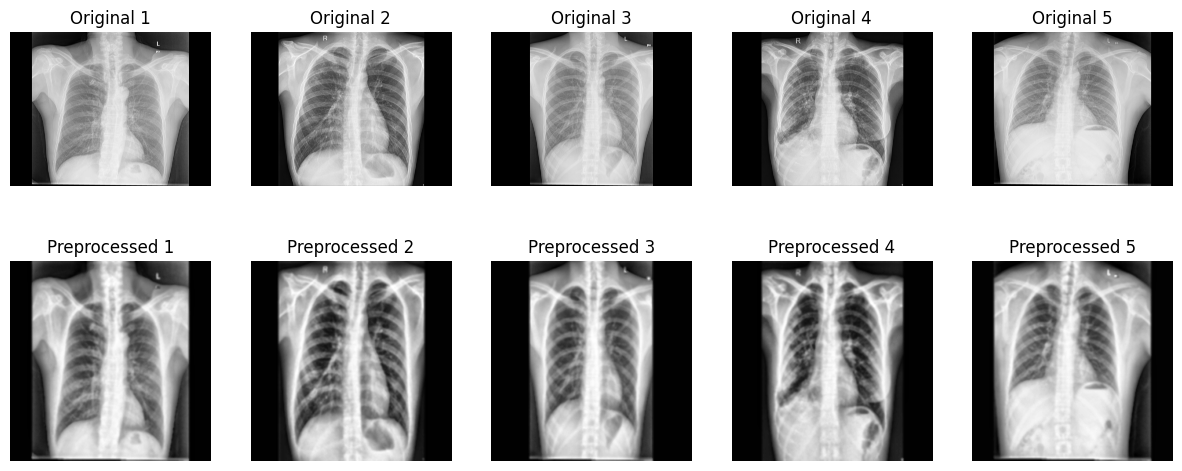

In [5]:
preprocessed_images = []
original_images = []
for i, image_name in enumerate(os.listdir(xray_images_dir)):
    if i >= 5:
        break

    image_path = os.path.join(xray_images_dir, image_name)

    original_images.append(plt.imread(image_path))

    preprocessed_image = preprocess_xray(image_path)

    if preprocessed_image is not None:
        preprocessed_images.append(preprocessed_image)

fig, axs = plt.subplots(2, 5, figsize=(15, 6))


for i in range(5):
    axs[0, i].imshow(original_images[i], cmap='gray')
    axs[0, i].axis('off')
    axs[0, i].set_title(f'Original {i + 1}')


for i in range(5):
    axs[1, i].imshow(preprocessed_images[i], cmap='gray')
    axs[1, i].axis('off')
    axs[1, i].set_title(f'Preprocessed {i + 1}')

plt.show()

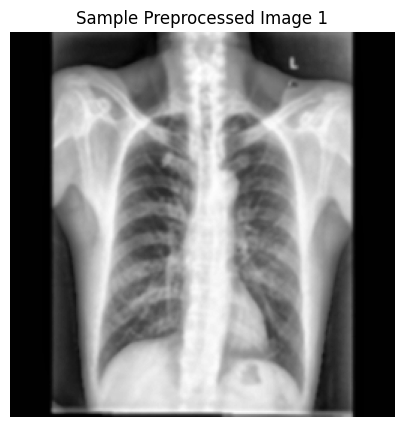

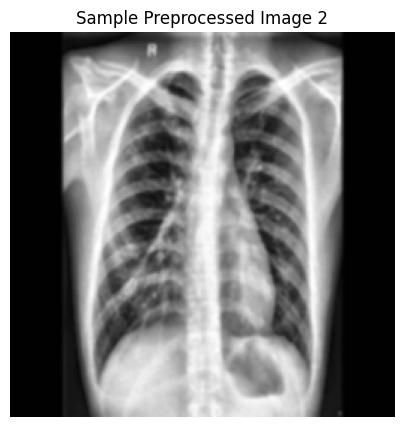

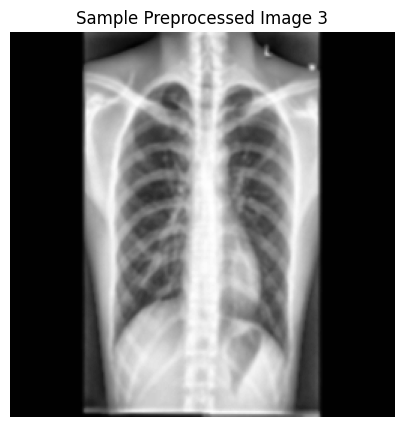

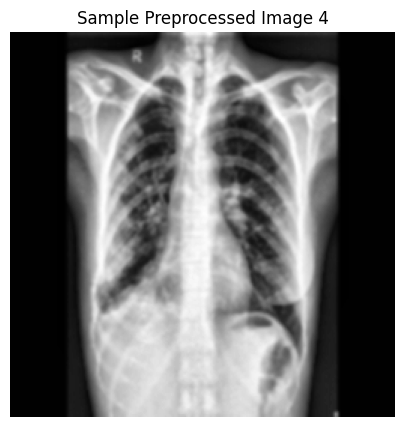

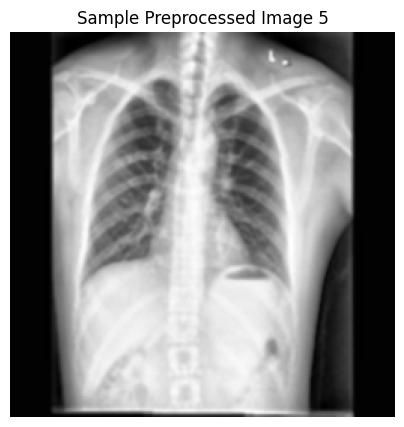

In [6]:
preprocessed_images = []


for image_name in os.listdir(xray_images_dir):
    image_path = os.path.join(xray_images_dir, image_name)


    preprocessed_image = preprocess_xray(image_path)
    if preprocessed_image is not None:
        preprocessed_images.append(preprocessed_image)

for i, img in enumerate(preprocessed_images[:5]):
    plt.figure(figsize=(5, 5))
    plt.imshow(img, cmap='gray')
    plt.title(f"Sample Preprocessed Image {i+1}")
    plt.axis('off')
    plt.show()